## VOO Stock Prices Prediction with ARIMA

In this notebook, we will explore the use of the Autoregressive Integrated Moving Average (ARIMA) model to forecast the stock prices of Vanguard S&P 500 ETF (VOO).

We will begin by importing the necessary libraries and loading the VOO stock price dataset. Next, we will preprocess the data and perform exploratory data analysis (EDA) to understand the characteristics of the dataset. We will then proceed to train an ARIMA model on the historical stock prices, and evaluate the performance of the model based on the same.

<br/>

---


### Introduction: What is ARIMA?

ARIMA (**A**uto**R**egressive **I**ntegrated **M**oving **A**verage) is a time series forecasting model that combines autoregressive and moving average components with differencing to handle non-stationary data. The general form of an ARIMA model is `ARIMA(p, d, q)`, where `p`, `d`, and `q` are the parameters of the model.

`p`: Specifies the number of lagged observations to include in the model. It models the dependence of the current value on its previous values. 

`d`: Specifies the number of times differencing is performed to achieve stationarity, so that statistical properties of the time series (such as mean, variance) remain constant over time.

`q`: Specifies the number of lagged forecast errors to include in the model. It captures the short-term fluctuations in the time series that are not accounted for by the AR component. 

<br/>

---

### I. Importing Libraries

Let us begin by importing the basic modules.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

---

### II. Data Preparation

Next, we load the dataset and do some simple data cleaning.

In [14]:
df = pd.read_csv('../datasets/VOO_full.csv')
display(df)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-01,354.549988,359.390015,354.500000,358.119995,340.781616,3721100
1,2021-03-02,358.380005,358.630005,355.160004,355.350006,338.145752,5462600
2,2021-03-03,354.700012,355.640015,350.559998,350.660004,333.682800,6317600
3,2021-03-04,350.489990,353.019989,341.920013,346.339996,329.571930,6604500
4,2021-03-05,349.769989,353.730011,342.589996,352.690002,335.614471,8721300
...,...,...,...,...,...,...,...
771,2024-03-22,479.869995,480.320007,478.820007,479.179993,479.179993,5876800
772,2024-03-25,477.730011,478.790009,477.549988,477.940002,477.940002,6081300
773,2024-03-26,479.059998,479.369995,476.429993,476.600006,476.600006,8073500
774,2024-03-27,479.510010,480.869995,477.450012,480.760010,480.760010,4951400


In [15]:
# Check number of rows and columns
print("Data dims: ", df.shape)

Data dims:  (776, 7)


In [16]:
# Check details of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       776 non-null    object 
 1   Open       776 non-null    float64
 2   High       776 non-null    float64
 3   Low        776 non-null    float64
 4   Close      776 non-null    float64
 5   Adj Close  776 non-null    float64
 6   Volume     776 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 42.6+ KB


In [17]:
# Check for missing values
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


<br/>

We can see that there are 7 columns, with 6 numeric variables and `Date` being the only categorical variable in the dataset. 

The important variables are `Open`, `High`, `Low` and `Close`, which are the four key data points used in financial markets, particularly in the context of stock market trading.

`Open`: The price at which a security first trades upon the opening of the trading day.  

`High`: The highest price at which a security trades during the trading day. 

`Low`: The lowest price at which a security trades during the trading day. 

`Close`: The final price at which a security trades at the end of the trading day. 

<br/>

In this analysis, we will be only focusing on using `Date` as a predictor for `Close`, which is the response variable.

In [18]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Check the cleaned dataset
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,354.549988,359.390015,354.500000,358.119995,340.781616,3721100
2021-03-02,358.380005,358.630005,355.160004,355.350006,338.145752,5462600
2021-03-03,354.700012,355.640015,350.559998,350.660004,333.682800,6317600
2021-03-04,350.489990,353.019989,341.920013,346.339996,329.571930,6604500
2021-03-05,349.769989,353.730011,342.589996,352.690002,335.614471,8721300


In [19]:
# Extract 'Close' columns as a separate DataFrame
df_close = df[['Close']]
df_close

,Close
Date,
2021-03-01,358.119995
2021-03-02,355.350006
2021-03-03,350.660004
2021-03-04,346.339996
2021-03-05,352.690002
...,...
2024-03-22,479.179993
2024-03-25,477.940002
2024-03-26,476.600006


---

### III. Exploratory Data Analysis

In this section, we will explore and visualise the data to obtain useful insights.

In [20]:
# Obtain statistical summary of each variable
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,776.000000,776.000000,776.000000,776.000000,776.000000,7.760000e+02
mean,394.096753,396.413247,391.684588,394.226392,384.298414,4.837919e+06
std,30.896275,30.462754,31.278122,30.913516,32.345366,2.185098e+06
min,320.839996,330.579987,319.869995,327.640015,319.887482,1.351300e+06
25%,370.890015,373.555001,367.797485,371.182503,360.895416,3.417675e+06
50%,392.834992,394.875000,391.120011,393.509995,382.577424,4.278250e+06
75%,413.307510,415.125008,411.475013,413.692504,402.873253,5.576350e+06
max,482.619995,483.239990,481.209991,481.350006,480.760010,2.297070e+07


<br/>

#### Multi-variate Exploration

A correlation matrix is useful in determining the dependency of each pair of variables in the dataset. Here, we want to find out whether the `OHLC` values are strongly correlated to each other, and whether `Volume` has any effect on the other variables.

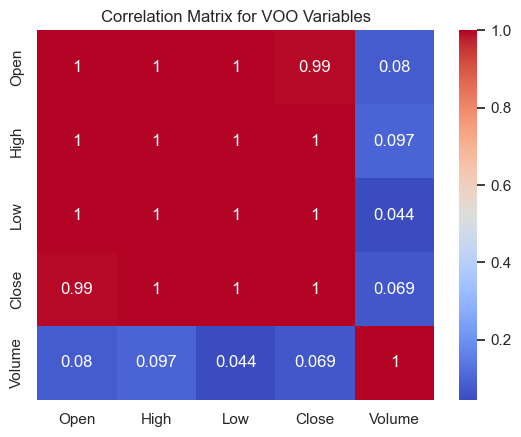

In [21]:
# Draw correlation matrix
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for VOO Variables')
plt.show()

From this heatmap, we can conclude that the `Open`, `High`, `Low`, and `Close` values are highly correlated with each other for VOO, meaning they tend to move together during the trading period. However, `Volume` does not strongly correlate with price movement, indicating that for VOO, volume changes are not necessarily associated with large changes in price. This can be useful information for trading strategies that might, for example, use volume as an indicator independent of price movements.

<br/>

#### Further Exploration

In order to further understand the data, we will plot two charts on the:

- Closing Price and Moving Averages
- Daily Returns and Volatility

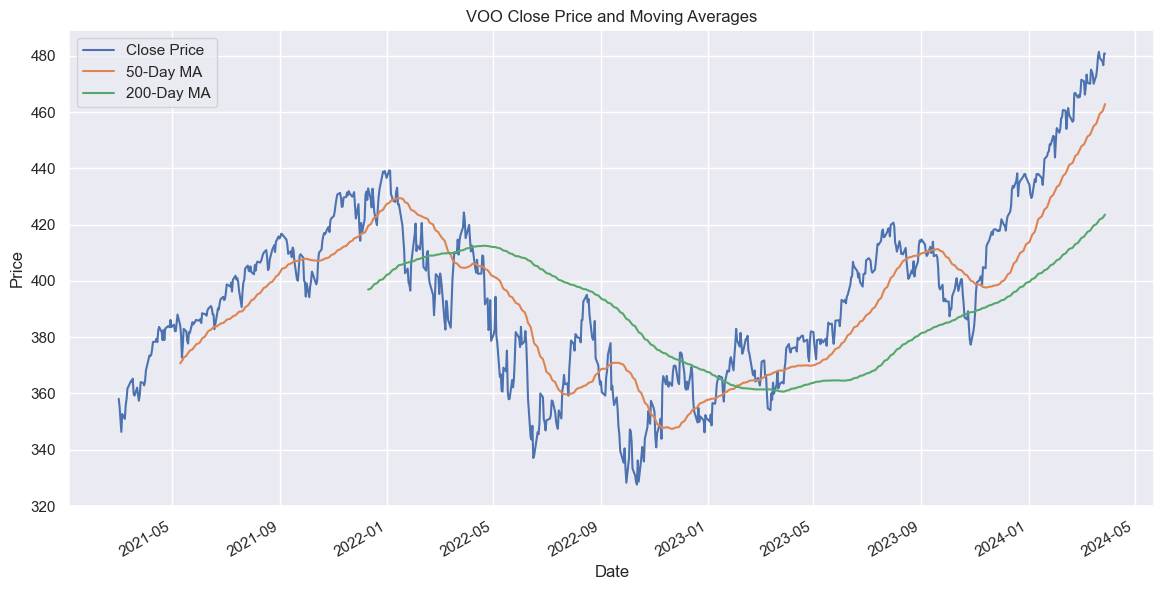

In [22]:
plt.figure(figsize=(14, 7))

# Plotting the Closing Price
df['Close'].plot(label='Close Price')

# Short-term (50-day) and Long-term (200-day) Moving Averages
df['MA50'] = df['Close'].rolling(50).mean()
df['MA200'] = df['Close'].rolling(200).mean()
df['MA50'].plot(label='50-Day MA')
df['MA200'].plot(label='200-Day MA')

plt.title('VOO Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In the chart, `MA200` (200-day moving average) starts later than `MA50` (50-day moving average) and the closing price line. This happens because a 200-day moving average requires 200 days of data before the first value can be calculated. Therefore, the MA200 line will begin to appear on the chart only after the first 200 days.

The 200-day moving average is used to determine the **long-term market trend** and smooth out price fluctuations. It's slower to respond to price changes than the 50-day moving average because it considers a larger set of data, which is why it appears smoother and starts later in the chart.

The overall chart shows the closing price of VOO, along with the short-term (`MA50`) and long-term (`MA200`) trends. The `MA50` line reacts more quickly to recent price changes, while the `MA200` provides a more gradual trend line that reflects longer-term price movements. When the closing price dips below these averages, it could be seen as a bearish signal, and when it's above, it could be bullish. The intersection points where the closing price or `MA50` crosses the `MA200` can be of particular interest to traders looking for trend reversals.

<br/>

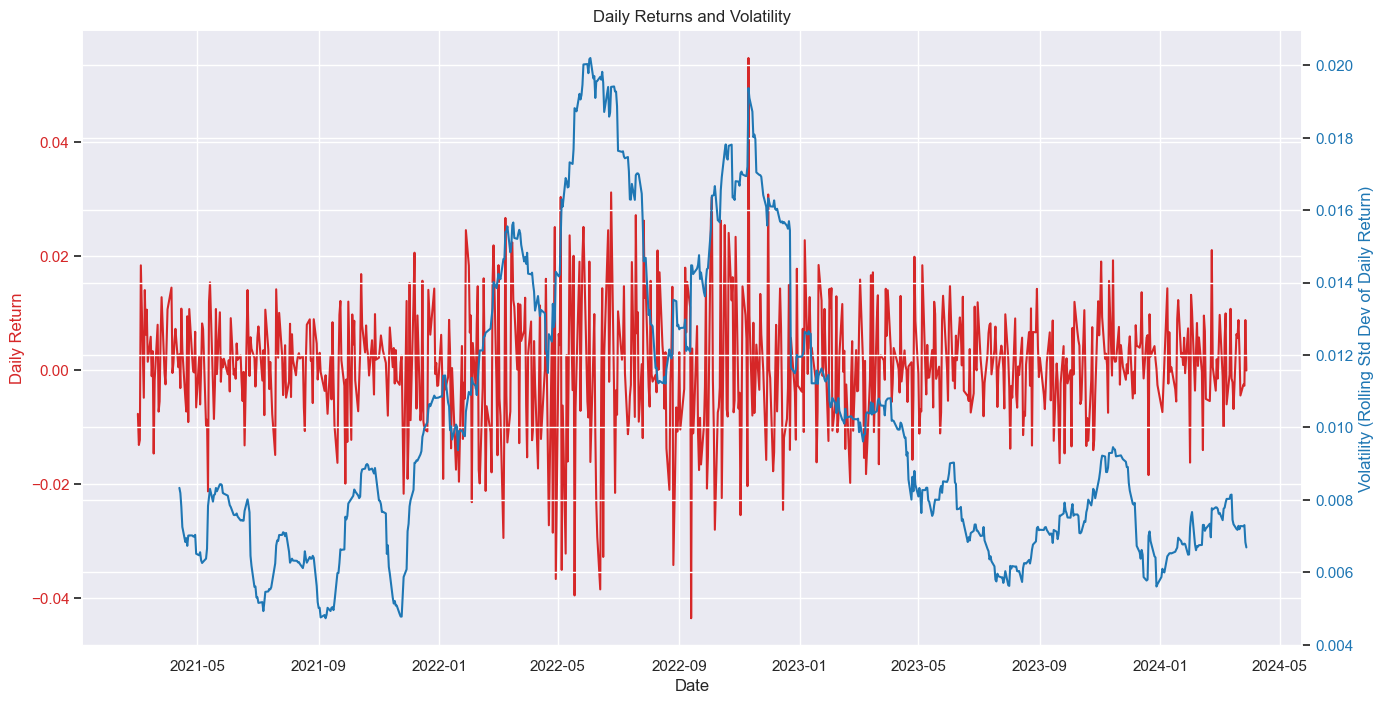

In [23]:
df['Daily Return'] = df['Close'].pct_change()

fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Return', color=color)
ax1.plot(df.index, df['Daily Return'], color=color, label='Daily Return')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Volatility (Rolling Std Dev of Daily Return)', color=color)  
ax2.plot(df.index, df['Daily Return'].rolling(window=30).std(), color=color, label='Rolling 30-Day Std Dev')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Daily Returns and Volatility')
plt.show()

When the red line moves sharply away from the zero line, it indicates significant price changes from the previous day. Peaks and troughs in the blue line show periods of high and low volatility, respectively. A higher blue line indicates that the price of the asset was fluctuating more during that period, signaling higher risk. Conversely, a lower blue line indicates less fluctuation and lower risk. 

One can also look for patterns or correlations between the two lines. For instance, if large spikes in daily returns (red line) coincide with peaks in volatility (blue line), it suggests that higher returns are associated with higher risk. It's also noteworthy to see if periods of increased volatility lead or follow large changes in daily returns, which might inform a trading strategy or risk management approach. 

This kind of chart is particularly useful for traders and investors who wish to understand the risk-return profile of an asset over time and might be used to make decisions about timing entries and exits into the market.

<br/>

#### Stationarity Test

Finally, we check the stationarity of the data using the Augmented Dickey-Fuller (ADF) test. The ADF test hypothesis is:

- Null Hypothesis (H0): The time series is non-stationary (presence of unit root).
- Alternative Hypothesis (H1): The time series is stationary. 

In [24]:
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import ADFTest

# Constant for degree of accuracy
DP = 4

# Perform the Augmented Dickey-Fuller test
result = adfuller(df_close)

# Get the p-value
p_value = result[1]
print("p-value:", round(p_value, DP))

# Check if the series is stationary
if p_value <= 0.05:
    print("The series is stationary.")
else:
    print("The series is non-stationary.")

p-value: 0.7566
The series is non-stationary.


The p-value from the ADF test is greater than the 0.05 significance level. Thus, we fail to reject the null hypothesis, and need to apply differencing to make the series stationary.

---

### IV. Model Training

Let us visualise the stock prices, differentiating between the Train and Test set data with different colours.

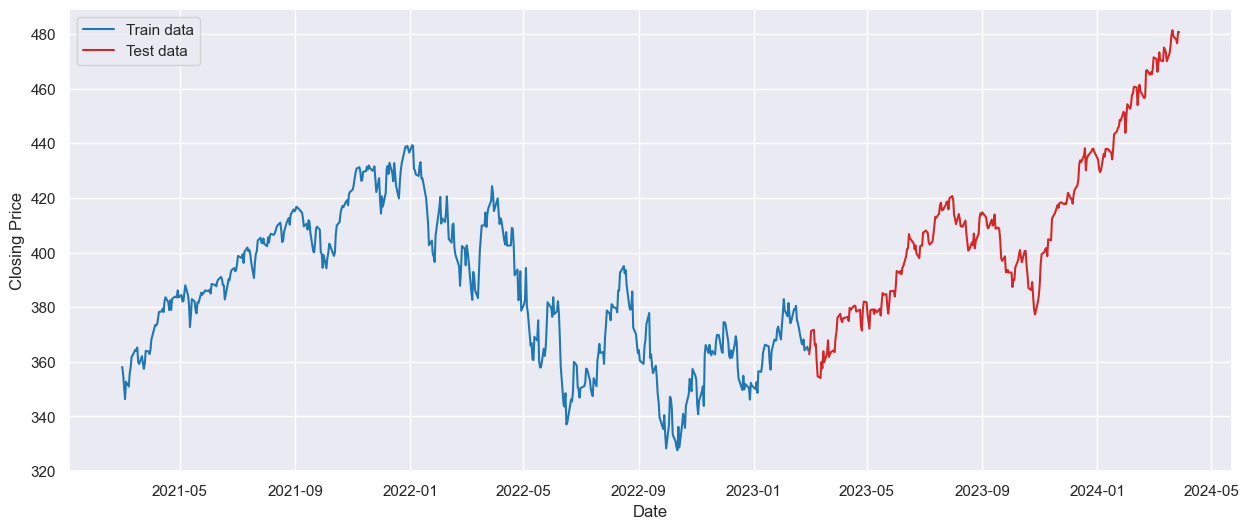

In [25]:
# Train-test split
train_df = df_close[:'2023-02-28'] # Training data until end of February 2023
test_df = df_close['2023-03-01':] # Test data starting from March 2023

# Draw a line chart for the dataset
plt.figure(figsize=(15, 6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(train_df, color='tab:blue', label='Train data')
plt.plot(test_df, color='tab:red', label='Test data')
plt.legend()
plt.show()

<br/>

Since the ARIMA model requires the data to be stationary, we expect that the data has to be differenced before the modelling process. We use the `auto_arima` function to search for the best parameters based on a predefined criterion, which is AIC by default. 

The Akaike Information Criterion (AIC) is a measure of the goodness of fit of the ARIMA model. It balances the trade-off between the goodness of fit and the complexity of the model, that is, the number of parameters used.

In [26]:
from pmdarima import auto_arima

# Using Auto ARIMA to find the best model 
model = auto_arima(train_df, seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2969.124, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2963.297, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2965.207, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2965.198, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2961.300, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2965.594, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.679 seconds


From the output, we can see that the best model selected by `auto_arima` is `ARIMA(0,1,0)(0,0,0)[0]`.

Just as we expected, the order of differencing (d) is equal to 1 as the data is non-stationary. All other parameters are zero as the model does not account for any seasonal patterns in the data.

---

### V. Model Prediction

Now, it is time to use our fitted ARIMA model to make predictions on the Test set. We use `ARIMA(0,1,0)`, which is the best model determined in the previous section.

In [27]:
from statsmodels.tsa.arima.model import ARIMA


# Define the ARIMA model
def arima_forecast(history):
    # Fit the model
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit()
    
    # Make the prediction
    output = model_fit.forecast()
    yhat = output[0]
    return yhat


# Walk-forward validation
history = [train_df.iloc[x] for x in range(len(train_df))]
predictions = list()
for t in range(len(test_df)):
    # Generate a prediction
    yhat = arima_forecast(history)
    predictions.append(yhat)
    # Add the predicted value to the training set
    obs = test_df.iloc[t]
    history.append(obs)

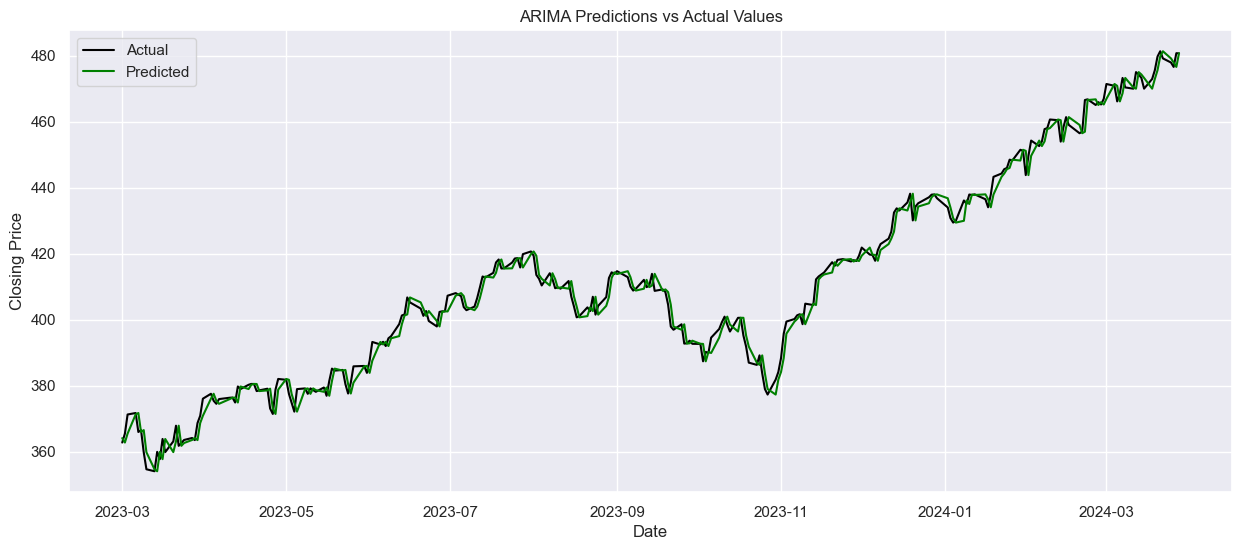

In [29]:
# Draw a line chart to compare the predicted and actual values
plt.figure(figsize=(15, 6), dpi=100)
plt.plot(test_df.index, test_df, color='black', label='Actual')
plt.plot(test_df.index, predictions, color='green', label='Predicted')
plt.title('ARIMA Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

---

### VI. Model Evaluation

In this final section, we will evaluate the performance of our ARIMA model based on the following metrics:

- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- Mean Absolute Percentage Error (MAPE)
- Coefficient of Determination (R^2)

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import math

# Compute and print performance metrics
mse = mean_squared_error(test_df, predictions)
print('Mean Squared Error (MSE)\t\t: ', round(mse, DP))

rmse = math.sqrt(mse)
print('Root Mean Squared Error (RMSE)\t\t: ', round(rmse, DP))

mape = mean_absolute_percentage_error(test_df, predictions)
print('Mean Absolute Percentage Error (MAPE)\t: ', round(mape, DP), '%')

r2 = r2_score(test_df, predictions)
print('Coefficient of Determination (R^2)\t: ', round(r2, DP))

Mean Squared Error (MSE)		:  9.6799
Root Mean Squared Error (RMSE)		:  3.1113
Mean Absolute Percentage Error (MAPE)	:  0.006 %
Coefficient of Determination (R^2)	:  0.9901


The RMSE, expressed as a percentage of the mean VOO price, is calculated below:

In [31]:
mean = np.mean(test_df)
rmse_percentage = (rmse / mean) * 100
print('RMSE as a percentage of the mean VOO price: ', round(rmse_percentage, DP), '%')

RMSE as a percentage of the mean VOO price:  0.7572 %


<br/>

---